<a href="https://colab.research.google.com/github/PranavS71/Ibot-cv/blob/main/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image to sketch**

# Image 1 (step by step)

In [ ]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
def checker(image):
  if(image is None):
    print("Error: Unable to load the image.")
  else:
    print("Image loaded successfully.")


Image loaded successfully.


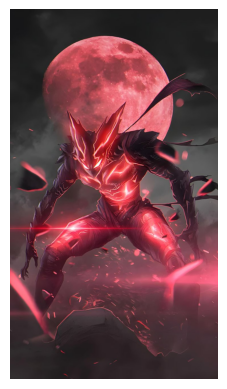

In [ ]:
#Uploading an image and viewing it
image=cv2.imread('garou.jpg')
checker(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

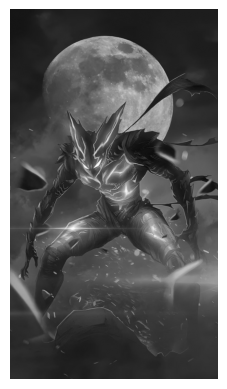

In [ ]:

#making the image grayscale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

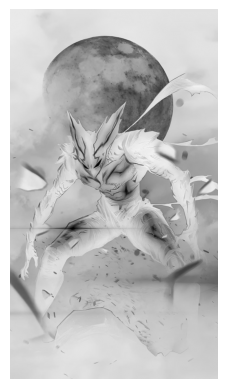

In [ ]:
#inverting the grayscale
invgray=255-gray
plt.imshow(invgray,cmap='gray')
plt.axis('off')
plt.show()

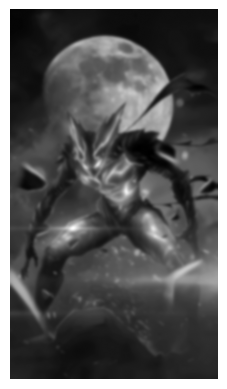

In [ ]:
#blurring the image to cancel the noise and inverting it
blu=cv2.GaussianBlur(invgray,(29,29),0)
inverted_blur=255-blu
plt.imshow(inverted_blur,cmap='gray')
plt.axis('off')
plt.show()

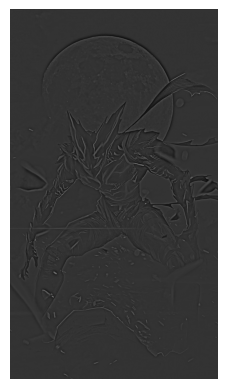

In [ ]:
#subbing in the given formula
sketch=gray/inverted_blur*256
plt.imshow(sketch,cmap='gray')
plt.axis('off')
plt.show()



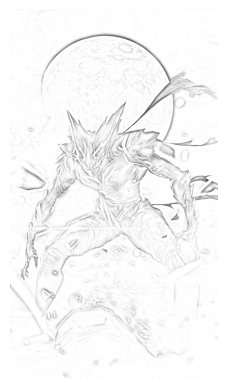

In [ ]:
#clipping values in 0 to 255 range and saving the file
sketch=np.clip(sketch,0,255)
cv2.imwrite('sketch.jpg',sketch)
plt.imshow(sketch,cmap='gray')
plt.axis('off')
plt.show()

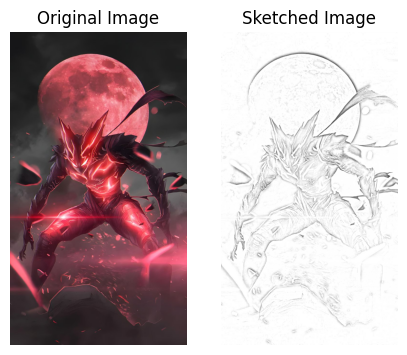

In [ ]:
#plotting each other next to each other using subplot
fig,axi=plt.subplots(1,2,figsize=(5,5))
axi[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
axi[0].set_title("Original Image")
axi[0].axis('off')

axi[1].imshow(sketch,cmap='grey')
axi[1].set_title("Sketched Image")
axi[1].axis('off')
plt.show()

#Image 2

Image loaded successfully.


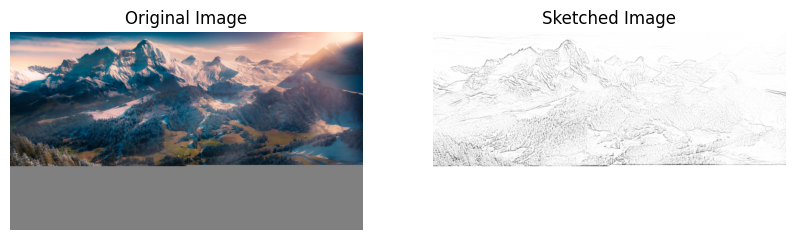

In [ ]:
image1=cv2.imread('swiss.jpg')
checker(image1)
gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
invgray1=255-gray
blu1=cv2.GaussianBlur(invgray1,(49,49),0)
inverted_blur1=255-blu1

sketch1=gray/inverted_blur1*256
sketch1=np.clip(sketch1,0,255)

cv2.imwrite('sketch1.jpg',sketch1)

fig1,axi1=plt.subplots(1,2,figsize=(10,10))
axi1[0].imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
axi1[0].set_title("Original Image")
axi1[0].axis('off')

axi1[1].imshow(sketch1,cmap='gray')
axi1[1].set_title("Sketched Image")
axi1[1].axis('off')
plt.show()

#Image 3

Image loaded successfully.


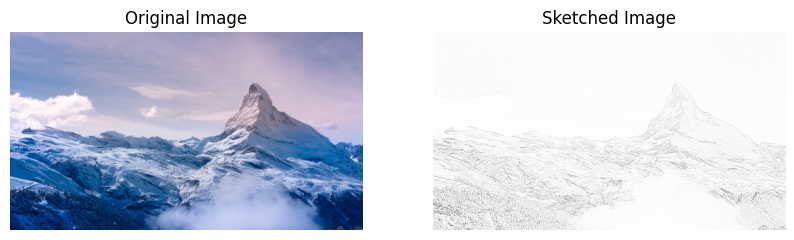

In [ ]:
image2=cv2.imread('mhorn.jpg')
checker(image2)
gray2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
invgray2=255-gray2
blu2=cv2.GaussianBlur(invgray2,(31,31),0)
inverted_blur2=255-blu2

sketch2=gray2/inverted_blur2*256
sketch2=np.clip(sketch2,0,255)

cv2.imwrite('sketch2.jpg',sketch2)

fig2,axi2=plt.subplots(1,2,figsize=(10,10))
axi2[0].imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
axi2[0].set_title("Original Image")
axi2[0].axis('off')

axi2[1].imshow(sketch2,cmap='gray')
axi2[1].set_title("Sketched Image")
axi2[1].axis('off')
plt.show()

#Bonus 1 and Bonus 2

In [ ]:
def ksize(k):
  if(k%2==0):   #k must be odd for kernel
    k=k+1
  elif(k<1):
    print("Invalid kernel size")
  return k

Image loaded successfully.
Enter the kernel size:25


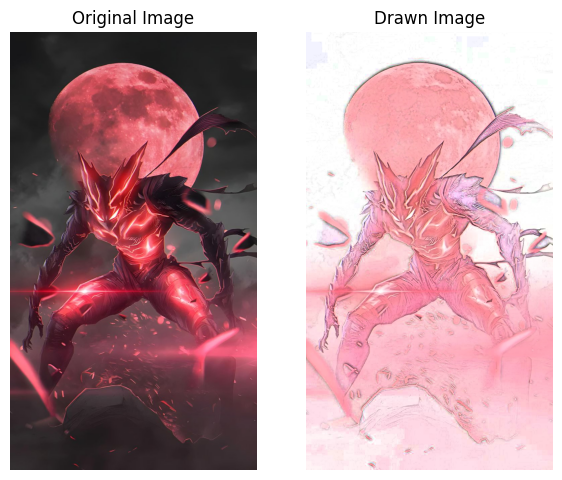

In [ ]:
image3=cv2.imread('garou.jpg')
checker(image3)
k= int(input("Enter the kernel size:"))
k=ksize(k)
#hsv conversion
hsv=cv2.cvtColor(image3,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)
#gray conversion
gray=cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
#inverting the grayscale
invgray=255-gray

#blurring the image to cancel the noise and inverting it
blu=cv2.GaussianBlur(invgray,(k,k),0)
inv_blur=255-blu

v3=cv2.divide(gray.astype(np.float32),inv_blur.astype(np.float32)+1e-6,scale=256.0)
v3=np.clip(v3,0,255).astype(np.uint8)


#desaturate
ns=(s*0.6).astype(np.uint8)

#merge the values
hue=cv2.merge([h,ns,v3])
temp=cv2.cvtColor(hue,cv2.COLOR_HSV2BGR)
cv2.imwrite('sketch3.jpg',cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))

fig,axi=plt.subplots(1,2,figsize=(7,7))
axi[0].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
axi[0].set_title("Original Image")
axi[0].axis('off')

axi[1].imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))
axi[1].set_title("Drawn Image")
axi[1].axis('off')
plt.show()

#Bonus 3

In [ ]:
def sketch_frame(f,k):
  gra=cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
  #inverting gray image
  inv=255-gra
  #blurring
  bluR=cv2.GaussianBlur(inv,(k,k),0)
  inv_bluR=255-bluR
  #formula substituiton
  fs=cv2.divide(gra,inv_bluR,scale=256)
  fs=np.clip(fs,0,255)
  return fs

In [ ]:
from tqdm import tqdm  #importing the library required for progress bar

#reading about the video
vid=cv2.VideoCapture('ron.mp4')
k= int(input("Enter the kernel size:"))
k=ksize(k)
if( vid.isOpened() == False ):
  print("Error opening video file")

#getting the basic properties of the video which are required for VideoWriter
fps=(vid.get(cv2.CAP_PROP_FPS))
h=int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
w=int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
cnt=int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

#VidoeWriter expects 3 Colour channels but since we are giving gray scale which has one we have to giv false
output=cv2.VideoWriter('ron_new.mp4',cv2.VideoWriter_fourcc(*'mp4v'),fps,(w,h),False)

#going through all frames as .read() will shift by itself to the next after first frame is read
for i in tqdm(range(cnt)):
  ret,frame=vid.read()
  if(ret==True):                                     #ret becomes false when there are no more frames to read
    sketch=sketch_frame(frame,k).astype(np.uint8)    #using udf for each frame and getting the sketched video
    output.write(sketch)
  else:
    break
vid.release()
output.release() #takes care of the trasnfer of all the frames which forms a video

Enter the kernel size:25


100%|██████████| 51/51 [00:00<00:00, 113.13it/s]


#MIni tasks

## Task 1

Image loaded successfully.


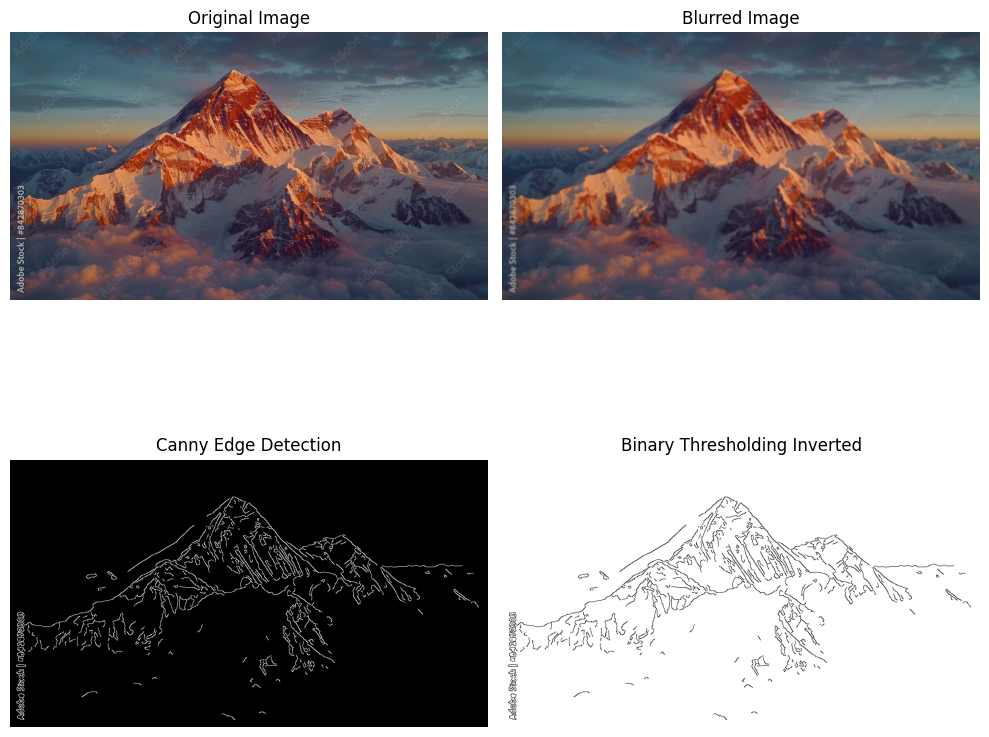

In [ ]:
#loading iamge
timage=cv2.imread("k2.jpg")
checker(timage)
#blurring
tblur=cv2.GaussianBlur(timage,(7,7),0)
#canny edge detection
tcanny=cv2.Canny(tblur,100,150)
#binary thresholding
ret,tbinary=cv2.threshold(tcanny,127,255,cv2.THRESH_BINARY_INV)

#plotting the images
fig,axi=plt.subplots(2,2,figsize=(10,10))

axi[0,0].imshow(cv2.cvtColor(timage,cv2.COLOR_BGR2RGB))
axi[0,0].set_title("Original Image")
axi[0,0].axis("off")

axi[0,1].imshow(cv2.cvtColor(tblur,cv2.COLOR_BGR2RGB))
axi[0,1].set_title("Blurred Image")
axi[0,1].axis("off")

axi[1,0].imshow(cv2.cvtColor(tcanny,cv2.COLOR_BGR2RGB))
axi[1,0].set_title("Canny Edge Detection")
axi[1,0].axis("off")

axi[1,1].imshow(cv2.cvtColor(tbinary,cv2.COLOR_BGR2RGB))
axi[1,1].set_title("Binary Thresholding Inverted")
axi[1,1].axis("off")

plt.tight_layout()
plt.show()

## Task 2

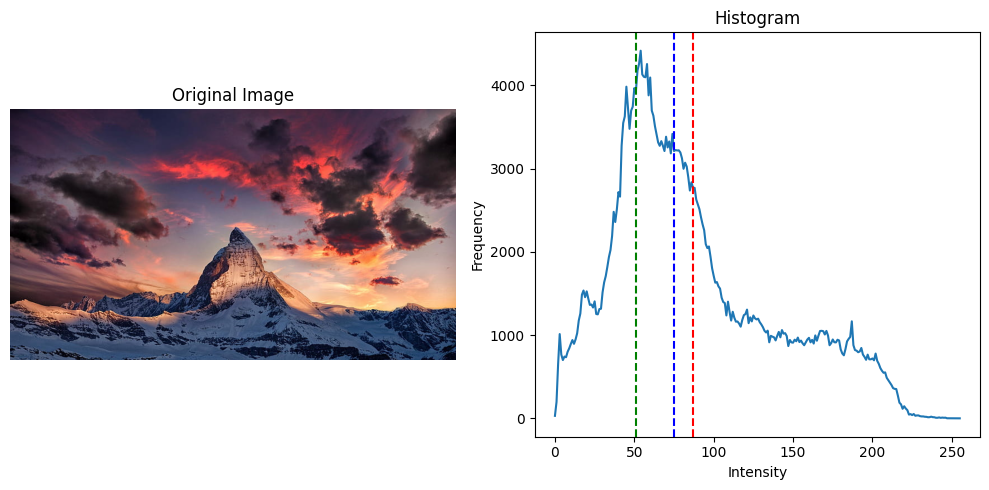

In [ ]:
#loading the image
rimage=cv2.imread("alp.jpg")
#gray scale
gray=cv2.cvtColor(rimage,cv2.COLOR_BGR2GRAY)

#adding statistics
tmean=np.mean(gray)
tstd=np.std(gray)
tmedian=np.median(gray)

#histogram of pixel intentsities
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
#plotting the histogram
fig,axi=plt.subplots(1,2,figsize=(10,5))

#plotting the images
axi[0].imshow(cv2.cvtColor(rimage,cv2.COLOR_BGR2RGB))
axi[0].set_title("Original Image")
axi[0].axis("off")

axi[1].plot(hist)
#plotting the statistical lines
axi[1].axvline(x=tmean,color='r',linestyle='--')
axi[1].axvline(x=tstd,color='g',linestyle='--')
axi[1].axvline(x=tmedian,color='b',linestyle='--')

axi[1].set_title("Histogram")
axi[1].set_xlabel("Intensity")
axi[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

